# Bars Average for all Block

In this document, we create simple county-wide average ethncity data for 2011 and 2019. This will serve as our control/comparison for final esitmates.

In [21]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib as mpl
import plotly.graph_objects as go
import kaleido

In [19]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 77.7 MB/s eta 0:00:01   | 50.0 MB 27.0 MB/s eta 0:00:02


In [2]:
ethnala=gpd.read_file('ethnicityindex.geojson')
stations=gpd.read_file("stations.geojson")
stationarea=gpd.read_file("stationarea.geojson")

In [3]:
tod=stations[stations['TOD']=='Yes']
ntod=stations[stations['TOD']=='No']

Creating 

In [4]:
b2019=ethnala[['Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']]
b2013=ethnala[['Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']]


def avblocks(block, x):
    averageblock=block.mean(axis=0, numeric_only=True)
    averageblock=averageblock.to_frame().rename(columns={0:x})
    county=['Non Hispanic White',
            'Non Hispanic Black', 
            'Non Hispanic American Indian and Alaska Native',
            'Non Hispanic Asian',
            'Non Hispanic Native Hawaiian and Other Pacific Islander',
            'Non Hispanic Some other race',
            'Non Hispanic Two or more races',
            'Hispanic']
    averageblock['Ethnicity']=county
   # averageblock=averageblock.transpose()
    return (averageblock)

In [5]:
b2019av=avblocks(b2019, 'Value 2019')
b2019av.head()

,Value 2019,Ethnicity
Non Hispanic White_2019,497.559273,Non Hispanic White
Non Hispanic Black_2019,163.640535,Non Hispanic Black
Non Hispanic American Indian and Alaska Native_2019,4.980880,Non Hispanic American Indian and Alaska Native
Non Hispanic Asian_2019,474.193117,Non Hispanic Asian
Non Hispanic Native Hawaiian and Other Pacific Islander_2019,12.693117,Non Hispanic Native Hawaiian and Other Pacific...


In [6]:
b2013av=avblocks(b2013,'Value 2013')
b2013av

,Value 2013,Ethnicity
Non Hispanic White_2013,494.994264,Non Hispanic White
Non Hispanic Black_2013,173.341300,Non Hispanic Black
Non Hispanic American Indian and Alaska Native_2013,4.286807,Non Hispanic American Indian and Alaska Native
Non Hispanic Asian_2013,390.588910,Non Hispanic Asian
Non Hispanic Native Hawaiian and Other Pacific Islander_2013,11.692161,Non Hispanic Native Hawaiian and Other Pacific...
Non Hispanic Some other race_2013,4.205545,Non Hispanic Some other race
Non Hispanic Two or more races_2013,57.985660,Non Hispanic Two or more races
Hispanic_2013,330.637667,Hispanic


In [7]:
blockabsolute=b2013av.merge(b2019av, on='Ethnicity')
blockabsolute

,Value 2013,Ethnicity,Value 2019
0,494.994264,Non Hispanic White,497.559273
1,173.341300,Non Hispanic Black,163.640535
2,4.286807,Non Hispanic American Indian and Alaska Native,4.980880
3,390.588910,Non Hispanic Asian,474.193117
4,11.692161,Non Hispanic Native Hawaiian and Other Pacific...,12.693117
5,4.205545,Non Hispanic Some other race,5.169216
6,57.985660,Non Hispanic Two or more races,70.956023
7,330.637667,Hispanic,354.702677


In [8]:
blockabsolute['Percentage_Change']=(blockabsolute['Value 2019']-blockabsolute['Value 2013'])/blockabsolute['Value 2013']*100

In [9]:
blockabsolute['Ethnicity'].to_list()

['Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic']

In [10]:
blockabsolute['Ethnicity']=['Black','White','Hispanic','NH/PI','AI/AN','Other races','Two or more races','Asian']

In [11]:
blockabsolute.columns=['Year 2013', 'Ethnicity', 'Year 2019', 'Change']

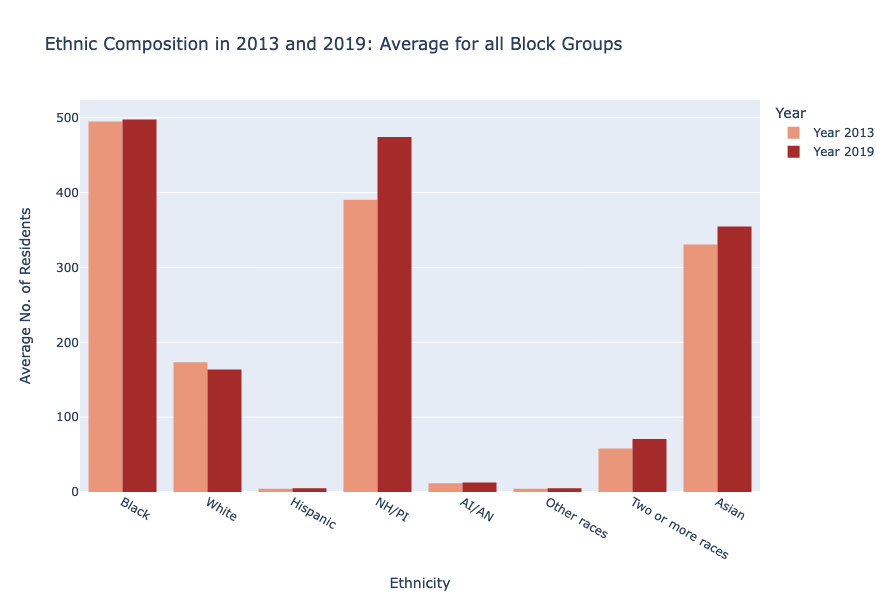

In [14]:
# a simple bar chart, putting date on the x-axis

fig = px.bar(blockabsolute,
             x='Ethnicity',
             y=['Year 2013', 'Year 2019'],
             barmode='group',
             height=600,
             title="Ethnic Composition in 2013 and 2019: Average for all Block Groups",
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity','value':'Average No. of Residents', 'variable':'Year'}
                     )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [23]:
fig.write_html('htmls/block_average_absolute.html')

In [ ]:
'''
import base64
from io import BytesIO
tmpfile = BytesIO()
#fig.write_image(file=tmpfile, format='.png')
#encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/block_average_absolute.html','w') as f:
    f.write(html)
#fig.write_image(file="htmls/block_average_absolute.png", format='.png',dpi=100, bbox_inches='tight')
plt.show()
'''

In [14]:
fig, ax=plt.figsize=(10,10)
ax.bar(blockabsolute['Year 2013'],blockabsolute.['Ethnicity'], width=0.35, yerr-

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()

       
# variables
labels = ['NA', 'EU', 'JP', 'Others']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
title = 'Video Game Sales By Platform and Region\n'
subtitle = 'Proportion of Games Sold by Region'
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(df_filter, labels, colors, title, subtitle)

SyntaxError: invalid syntax (901803081.py, line 2)

In [15]:
df = px.data.blockabsolute()
fig = px.bar(df, x="total_bill", y="day", orientation='h')
fig.show()

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

AttributeError: module 'plotly.express.data' has no attribute 'blockabsolute'

In [16]:
blockabsolute

,Year 2013,Ethnicity,Year 2019,Change
0,505.568680,Black,511.148258,1.103624
1,178.283600,White,169.297188,-5.040515
2,4.514732,Hispanic,5.171532,14.547947
3,410.539755,NH/PI,502.542984,22.410309
4,11.817436,AI/AN,13.129288,11.100992
5,4.434414,Other races,5.291672,19.331938
6,59.856182,Two or more races,73.215391,22.318846
7,337.760662,Asian,359.935020,6.565110


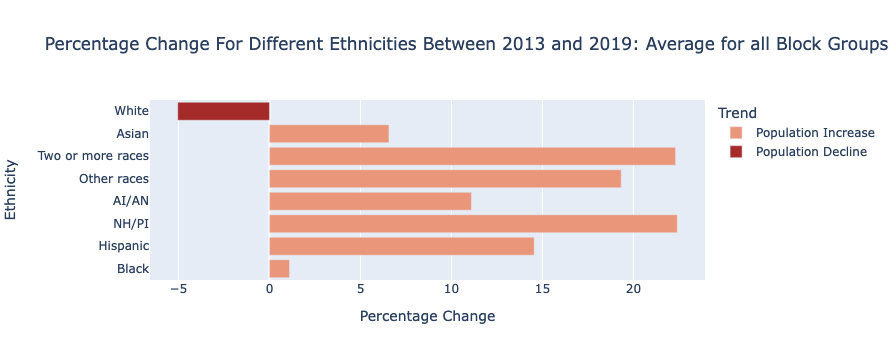

In [17]:
blockabsolute["Trend"] = np.where(blockabsolute["Change"]<0, 'Population Decline','Population Increase')
fig = px.bar(blockabsolute, 
             y=blockabsolute['Ethnicity'], 
             x=blockabsolute['Change'],
             title="Percentage Change For Different Ethnicities Between 2013 and 2019: Average for all Block Groups",
             orientation='h',
             color=blockabsolute['Trend'],
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity',
                    'Change':'Percentage Change'}
            )

fig.show()
# brown 

In [19]:
iqv=ethnala[['iqv_2013_sq','iqv_2019_sq',]]
iqv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iqv_2013_sq  7405 non-null   float64
 1   iqv_2019_sq  7389 non-null   float64
dtypes: float64(2)
memory usage: 116.3 KB


In [20]:
iqv_average=iqv.mean(axis=0, numeric_only=True)
iqv_average=iqv_average.to_frame().rename(columns={0:'Diversity Index'})
iqv_average=iqv_average.transpose()
iqv_average.columns=[['Diversity Index 2013','Diversity Index 2019']]

In [21]:
iqv_average=iqv_average.transpose()
iqv_average

,Diversity Index
Diversity Index 2013,0.679786
Diversity Index 2019,0.689643


In [22]:
year=['2013','2019']
year
iqv_average['Year']=year

In [32]:
iqv_average

,Diversity Index,Year
Diversity Index 2013,0.679786,2013
Diversity Index 2019,0.689643,2019


In [41]:
iqv_average.to_csv(r"iqv_average.csv")

<Figure size 720x360 with 0 Axes>

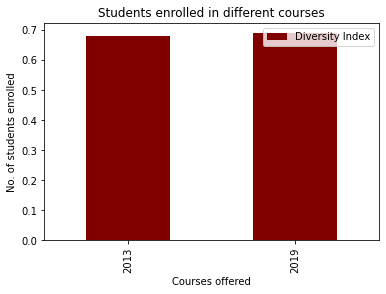

In [104]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
iqv_average.plot.bar(x='Year', y='Diversity Index', color ='maroon')
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

We have the average ethnicities, ploted quite sadly. Beautification for next week.